# Designs for contours on gradient backgrounds

***

## Contour plots of products &/or quotients of trigonometric functions on simple gradient backgrounds, generated in *Python* using *matplotlib*.

### Created by Sadie Bartholomew, June '16 - May '17 *

#### \*code tidied, descriptive Notebook created & project uploaded  to *GitHub*  March 19'

***

## Introduction

With just the basic ingredients of:

* mathematics(!) as implemented computationally in *Python* with the help of [*numpy*](http://www.numpy.org/); &
* the plotting functionality provided by [*matplotlib*](https://matplotlib.org/),

it is possible to create some striking & intricate designs.

In this mini-project, I observed this for the specific case of two-dimensional contour plots.

By typing up random two-variable functions of (mainly) trigonometric products, plotting them & looking for notable patterns by adjusting parameters & honing in on regions of interest, I picked out 13 generated contour designs that I thought were worthy of sharing, & distinct enough to together form a nice collection of visuals.

I thought the contour sets merited sharing in their own right, without the need for introducing colour or other plotted elements (I am fond of minimalism). However, I did decide to complement the contours with a background image based on a (in most cases simple, so as not to distract) two-variable continuous function, & to provide harmonious colouring to both plotted elements, simply because this serves to further demonstrate the extensive capability of *matplotlib*.

## Code & Methodology

The basic code is very simple, & is as follows (see the [``master_script.py``](https://github.com/sadielbartholomew/creative-mini-projects/blob/master/contours-on-gradient-backgrounds/master_script.py) for the original source code, from which this has been taken, with minor modifications):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
Designs for contours on gradient backgrounds, created by Sadie Bartholomew.

This is a version of the master script 'master_script.py' broken up & reformulated slightly
to accommodate an interactive walkthrough in the Notebook format.
"""

def plot_my_design(design_tag: str, design_data: tuple):
    
    """ Plot a single named design of contours on gradient backgrounds. """

    (contour_function, background_function, grid_resolution, axes_limits,
     view_limits, background_limits, linewidth_parameters,
     contour_colourmap, background_colourmap) = design_data

    # Set the figure dimensions and hide the axes ticks and labels.
    x, y = np.meshgrid(
        np.linspace(*axes_limits[:2], num=grid_resolution),
        np.linspace(*axes_limits[-2:], num=grid_resolution)
    )

    plt.xticks([])
    plt.yticks([])
    plt.axis(view_limits)

    # Plot the background.
    plt.imshow(
        background_function(x, y), extent=background_limits,
        interpolation="bilinear", origin="lower", cmap=background_colourmap
    )

    # Plot the contours on top of the background.
    #     (Note: 'RuntimeWarning: invalid value encountered in...' is raised for
    #      certain designs where e.g. division by zero is encountered, but this is
    #      mathematically inevitable and often important in the resulting design.)
    plt.contour(
        x, y, contour_function(x, y), linewidths=np.arange(*linewidth_parameters),
        cmap=contour_colourmap
    )

    # Show the overall figure to display the chosen design.
    design_number, design_name = design_tag.split("_")
    print(f"This is design number {design_number}, entitled '{design_name}':")
    plt.show()

In short, this code:

* **sets up a figure**, with all text i.e. axes ticks & labelling hidden for a clean visual;
* onto it **plots a gradient background** defined by some two-variable function over a set region;
* on top of that **plots contours**, defined by another two-variable function & residing on a set-resolution meshgrid, over another set region;
* **displays a set region** of the overall plot respresenting the final design.

To see it in action, let's input the (name &) data for one of the final designs.

First, execute the following two cells to apply some settings on the Notebook, so that the generated designs are presented as nicely as possible:

In [2]:
# Customisation for the Notebook, so output plots are large & not accompanied by warning boxes
import warnings
warnings.simplefilter('ignore')  # disable Notebook prompt for 'RuntimeWarning: invalid value'
plt.rcParams['figure.figsize'] = (12, 12)  # make generated designs larger than default plots

In [3]:
%%javascript

// Customisation for the Notebook, so designs appear in the main window (disable sub-window).
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Now, run the following cell to generate an example design (along with a printed message to label it with its name):

This is design number 3, entitled 'star':


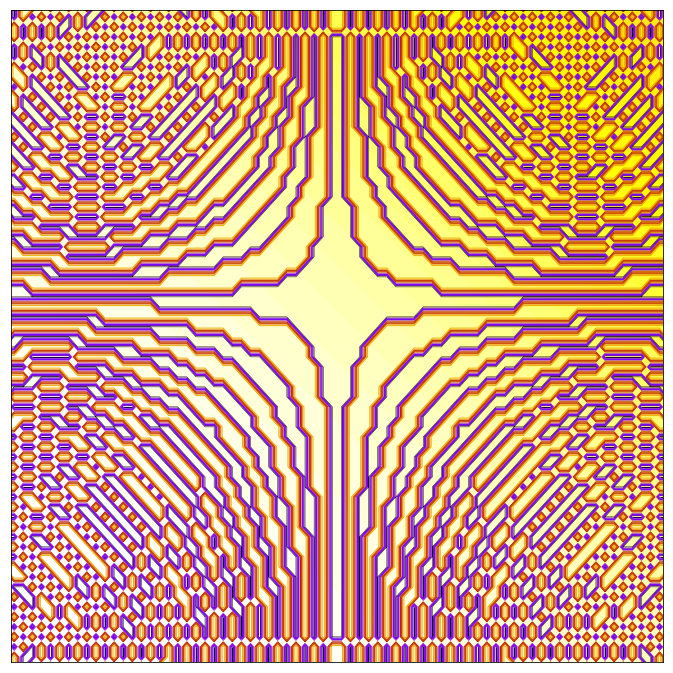

In [4]:
plot_my_design(
    "3_star",
        (
         lambda u, v:
         0.001 * np.tanh(np.cos(-10 * u * v**2)**-3 * np.exp(u**-2 * v**5)),
         lambda u, v:
         (u + v)**4,
         300,
         (-5, 5, -5, 6),
         (-1.2, 1.2, 3.0, 5.4),
         (-5, 5, -5, 6),
         (0.5, 2.0, 0.5),
         "gnuplot",
         "gnuplot2_r"
        )
)

Let's look at one more example before going on to generate all of the designs. For each different design, we just vary the input data, which consists of the following:

* **Functions of two variables**:
  * ``contour_function``: two-variable function (in u and v) defining the contours;
  * ``background_function``: two-variable function (in u and v) defining the background gradient.

* **Dimensional parameters for region limits & resolution**:
  * ``grid_resolution``: integer defining the resolution for both axes for the meshgrid which
    the contours inhabit;
  * ``grid_limits``: 4-tuple defining the x and y limits of the contour-residing meshgrid;
  * ``view_limits``: 4-tuple defining the x and y axes limits of the overall design view;
  * ``background_limits``: 4-tuple defining the x and y limits for the area over which the
    background gradient is plotted;
  * ``linewidth_parameters``: 3-tuple defining arguments to numpy.arange specifying the line widths.

* **Colour mappings provided by [*matplotlib* colormaps](https://matplotlib.org/gallery/color/colormap_reference.html)**:
  * ``contour_colourmap``: matplotlib colormap defining the colouring of the contours;
  * ``background_colourmap``: matplotlib colormap defining the colouring of the background gradient.

Run the next cell to see another possibility, & go back to compare this input data to that defining the previous design; you should see that with different parameters we can create a design that is highly dissimilar!

In [5]:
plot_my_design(
    "4_sweep",
        (
         lambda u, v:
         np.arcsin((np.exp(np.sin(0.9999 * u + v**2)) / (v / u + u - 0.001))) -
         0.001 * v * np.sinh(0.01 * u * v) / u + v * np.sin(u * v) - u,
         lambda u, v:
         -0.5 * v**3 / u + u**0.3,
         700,
         (-12, 12, -12, 12),
         (4, 12, 4, 12),
         (-12, 12, -12, 12),
         (3, 4, 1),
         "terrain",
         "CMRmap"
        )
)

This is design number 4, entitled 'sweep':


## Definition (in data) & generation of all 13 designs

As I mentioned in the introduction, I created a collection of 13 designs which I especially liked. Here they all are, as defined in a single data structure (a dictionary with the design tags i.e. number & name as the keys & the corresponding design data as the values).

Execute this cell to load the data into the kernel.

In [6]:
DESIGNS = {
    "1_vortices":
        (
         lambda u, v:
         np.sinh(v / 10)**2 - (np.sin(u * v) * np.cos(3 * v))**2 + 0.1,
         lambda u, v:
         -3 * v**4 + v**2 - v,
         1000,
         (-9, 9, -9, 9),
         (-2.5, 2.5, 4, 9),
         (-2.5, 2.5, 4, 9),
         (1.5, 4, 0.5),
         "afmhot",
         "YlOrRd"
        ),
    "2_seams":
        (
         lambda u, v:
         0.002 * np.sin((u + v)**-1) * np.cosh(u * v)**-2 + np.exp(-u * v**2),
         lambda u, v:
         (u + v)**5,
         30,
         (-0.06, 0.06, -0.06, 0.06),
         (-0.06, 0.06, -0.06, 0.06),
         (-0.06, 0.06, -0.06, 0.06),
         (1, 3, 0.5),
         "seismic",
         "BuPu"
        ),
    "3_star":
        (
         lambda u, v:
         0.001 * np.tanh(np.cos(-10 * u * v**2)**-3 * np.exp(u**-2 * v**5)),
         lambda u, v:
         (u + v)**4,
         300,
         (-5, 5, -5, 6),
         (-1.2, 1.2, 3.0, 5.4),
         (-5, 5, -5, 6),
         (0.5, 2.0, 0.5),
         "gnuplot",
         "gnuplot2_r"
        ),
    "4_sweep":
        (
         lambda u, v:
         np.arcsin((np.exp(np.sin(0.9999 * u + v**2)) / (v / u + u - 0.001))) -
         0.001 * v * np.sinh(0.01 * u * v) / u + v * np.sin(u * v) - u,
         lambda u, v:
         -0.5 * v**3 / u + u**0.3,
         700,
         (-12, 12, -12, 12),
         (4, 12, 4, 12),
         (-12, 12, -12, 12),
         (3, 4, 1),
         "terrain",
         "CMRmap"
        ),
    "5_circuitry":
        (
         lambda u, v:
         np.arctan((v * np.sin(30 * u / v))**-3),
         lambda u, v:
         200000 * u / v**0.8 + 0.33,
         800,
         (-0.5, 0.5, -0.5, 0.5),
         (0.37, 0.39, -0.003, 0.017),
         (-0.5, 0.5, -0.5, 0.5),
         (2, 3, 0.5),
         "ocean_r",
         "gist_earth_r"
        ),
    "6_lattice":
        (
         lambda u, v:
         (v**2 / np.sin(u**2) - u**2 / np.cos(v**2)) * np.tanh(u * v),
         lambda u, v:
         -u**1.15 * v**1.15 - u**1.1 / v**1.1 + v**1.1 / u**1.1,
         1000,
         (-21.5, 21.5, -21.5, 21.5),
         (15, 21.5, 15, 21.5),
         (-21.5, 21.5, -21.5, 21.5),
         (1, 3, 0.5),
         "PRGn",
         "gnuplot2_r"
        ),
    "7_warped":
        (
         lambda u, v:
         v**2 * np.tan(u) - u**2 * np.sin(v),
         lambda u, v:
         np.sin(v) * np.abs(v)**0.5,
         1000,
         (-150, 150, -150, 150),
         (-80, 80, -80, 80),
         (-150, 150, -150, 150),
         (2, 3, 0.5),
         "terrain",
         "gist_heat"
        ),
    "8_jagged":
        (
         lambda u, v:
         np.sin(np.exp((u - v) / (u + u / v))),
         lambda u, v:
         u - v**2,
         600,
         (-20, 20, -20, 20),
         (0.3, 1.3, -2.3, -1.3),
         (-20, 20, -20, 20),
         (2, 5, 1),
         "rainbow",
         "gnuplot_r"
        ),
    "9_ripples":
        (
         lambda u, v:
         np.exp(-0.1 * v**-2) * ((np.cos(0.2 * v**5 - u**4 + u * v**3))**7 +
                                 np.cos(-0.01 * u * v) - np.sin(-0.2 * u * v)),
         lambda u, v:
         (u + v)**1.5,
         90,
         (2, 22, 2, 22),
         (2, 22, 2, 22),
         (2, 22, 2, 22),
         (2, 3, 1),
         "terrain",
         "YlGnBu_r"
        ),
    "10_whirls":
        (
         lambda u, v:
         np.sin((u - v) * np.exp(v - u) * np.cosh(v)) +
         np.cos((u - v) * np.exp(v - u) * np.sinh(v)),
         lambda u, v:
         -np.abs(u)**0.3,
         1000,
         (-5, 5, -5, 5),
         (-3.8, -2.6, -1.2, 0.0),
         (-5, 5, -5, 5),
         (2, 3, 1),
         "gist_earth",
         "cubehelix"
        ),
    "11_panels":
        (
         lambda u, v:
         np.tanh(3 * u) * np.tanh(3 * v) * np.sin(u + 2 * v),
         lambda u, v:
         2 * v + u,
         800,
         (-8.1, 8.1, -8.1, 8.1),
         (-8, 8, -8, 8),
         (-8.1, 8.1, -8.1, 8.1),
         (2, 6, 2),
         "RdBu_r",
         "RdBu"
        ),
    "12_cellular":
        (
         lambda u, v:
         np.arctanh((v * u**-2) / (u * v)) *
         np.cos(u**3 / (u**-0.5 * v**2)) * u**-v,
         lambda u, v:
         (u - v)**4,
         1500,
         (1, 1.05, 0, 1),
         (1.01, 1.025, 0.015, 0.03),
         (1, 1.05, 0, 1),
         (2, 6, 2),
         "summer",
         "YlGn_r"
        ),
    "13_interlocking":
        (
         lambda u, v:
         np.cosh(np.sin(-100 * u + 10 * v)) / (np.log(np.abs(v**-1)) + 1),
         lambda u, v:
         u - 3 * v,
         1000,
         (1, 2.02, 1, 2.02),
         (1.02, 1.98, 1.02, 1.98),
         (1, 2.02, 1, 2.02),
         (3, 5, 1),
         "gist_stern",
         "BuPu_r"
        ),
}

So we do not have to call ``plot_my_design()`` 13 times, I have set up a quick function to plot everything at once. Run the following cell (assuming you have already run the previous one to load in the ``DESIGN`` data structure, as required) & you will generate all of the designs in succession:

This is design number 1, entitled 'vortices':


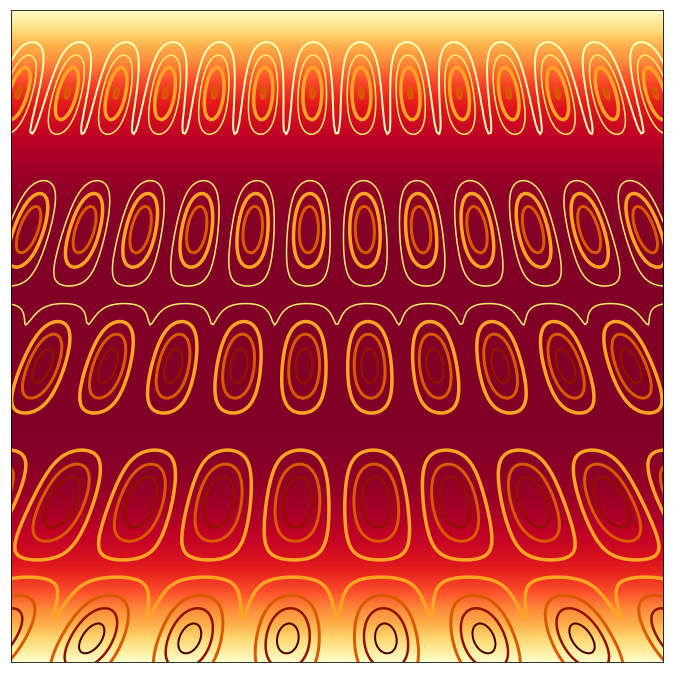

This is design number 2, entitled 'seams':


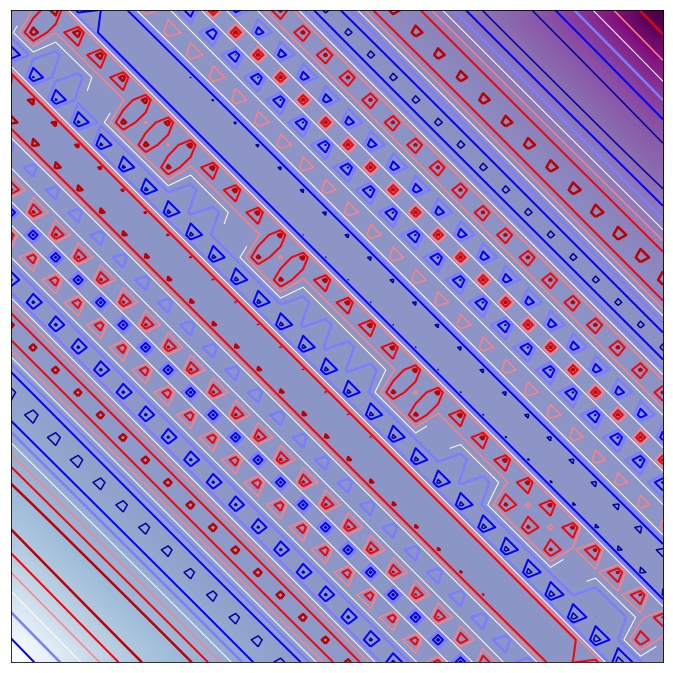

This is design number 3, entitled 'star':


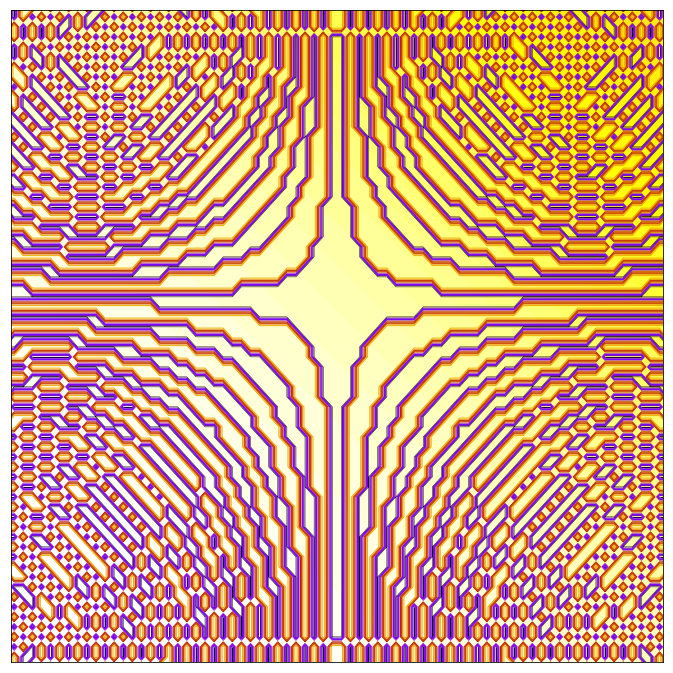

This is design number 4, entitled 'sweep':


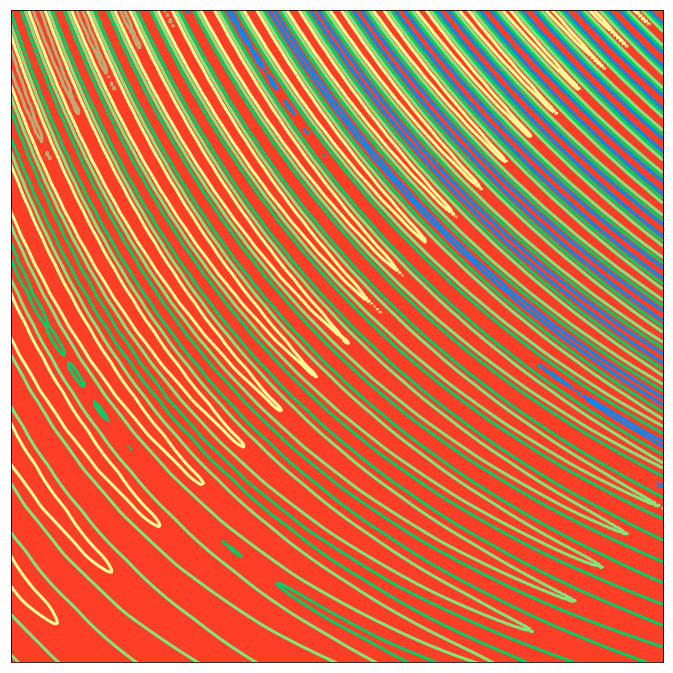

This is design number 5, entitled 'circuitry':


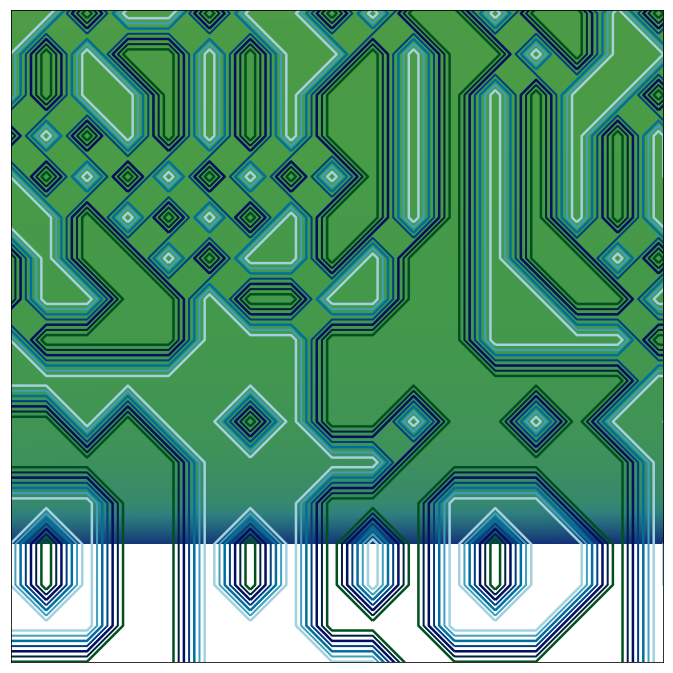

This is design number 6, entitled 'lattice':


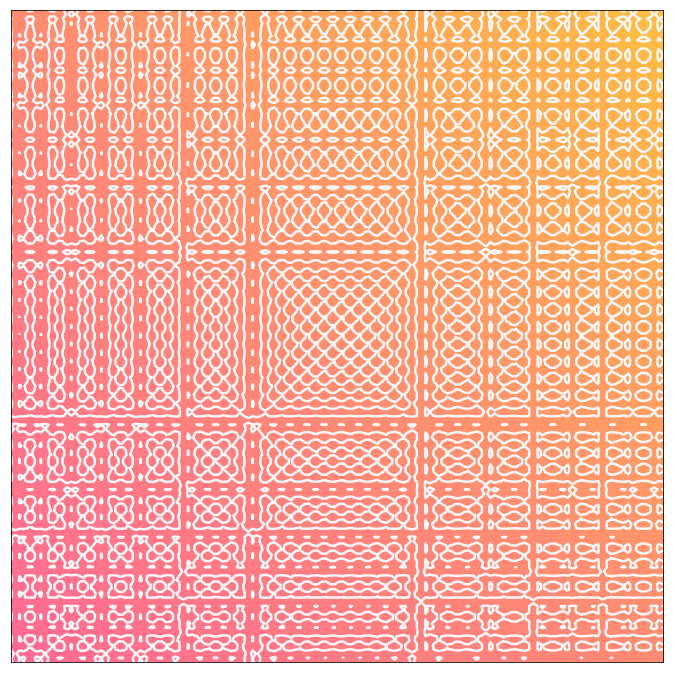

This is design number 7, entitled 'warped':


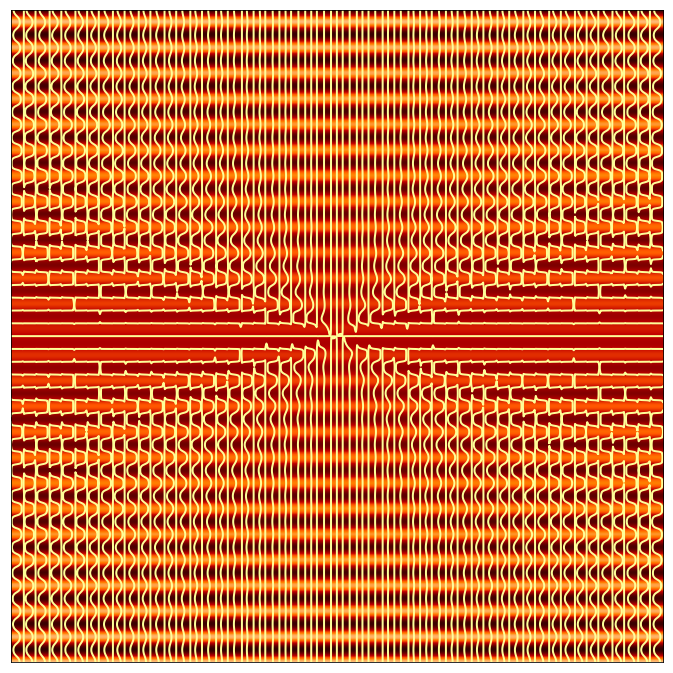

This is design number 8, entitled 'jagged':


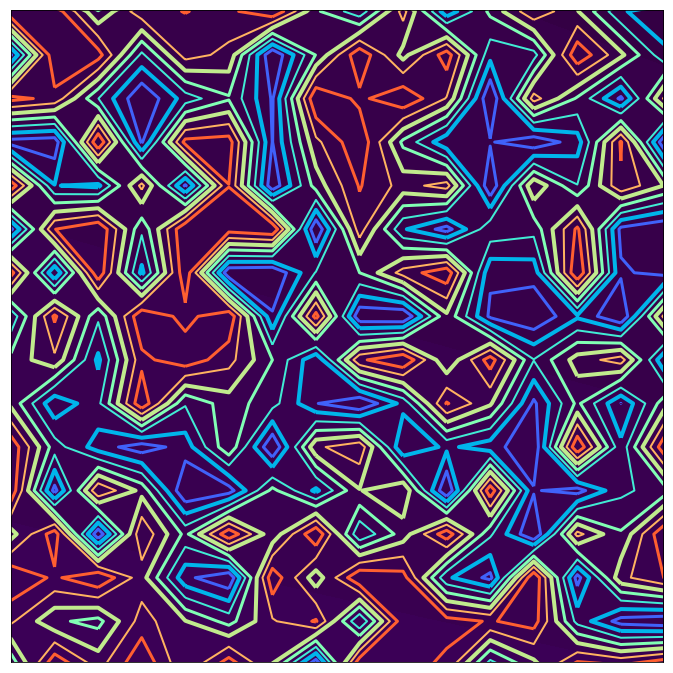

This is design number 9, entitled 'ripples':


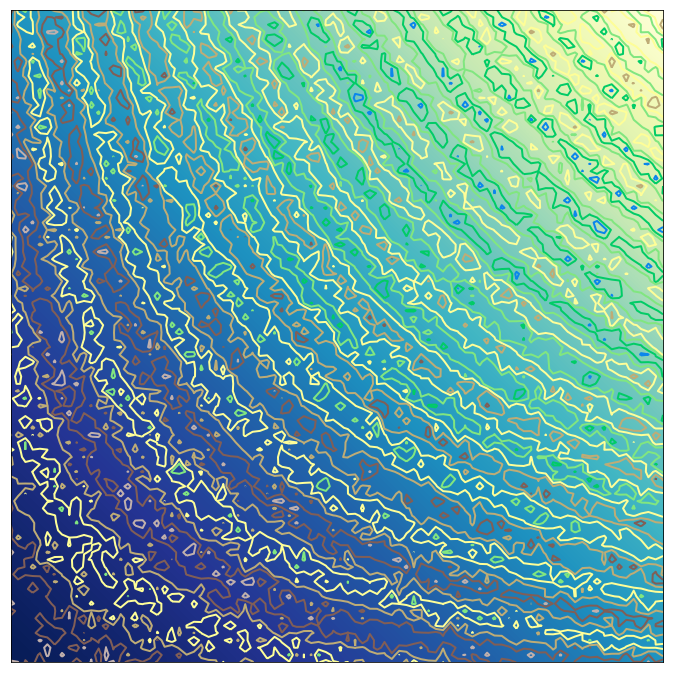

This is design number 10, entitled 'whirls':


This is design number 11, entitled 'panels':


This is design number 12, entitled 'cellular':


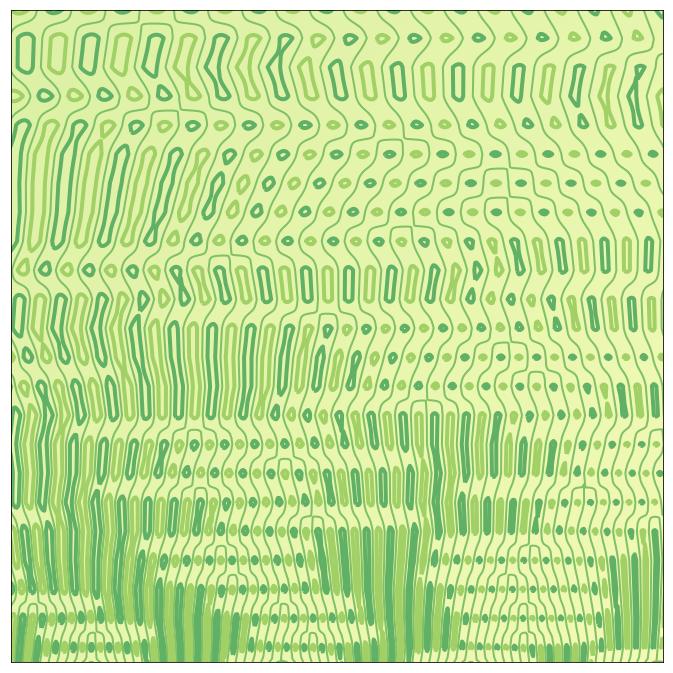

This is design number 13, entitled 'interlocking':


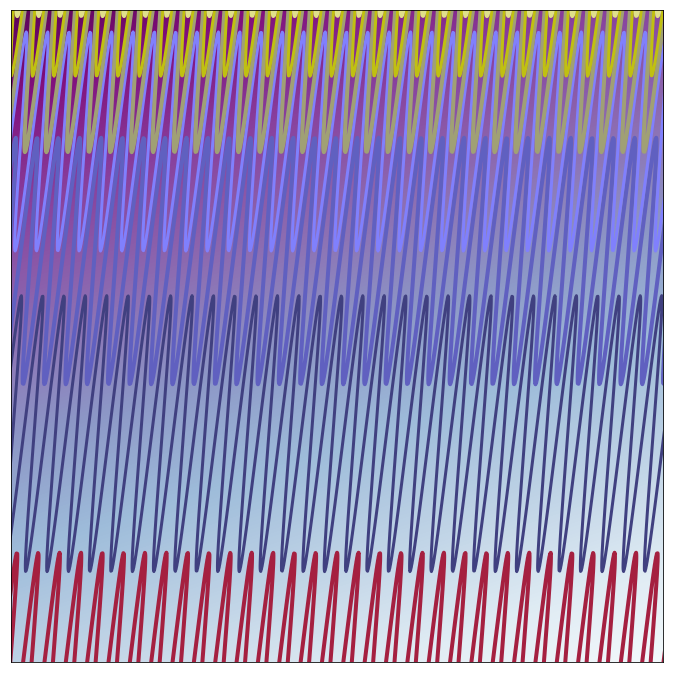

In [7]:
def plot_my_designs(design_names_and_data: dict):

    """ Plot several named designs of contours on gradient backgrounds. """

    for tag, data in design_names_and_data.items():
        plot_my_design(tag, data)


plot_my_designs(DESIGNS)

I encourage anyone who is curious to cross-reference the origin data with the corresponding outputs, &/or to explore other inputs to create their own designs with the basic code.

I've tried to create an illustrative sample of possibilities, but there are endless patterns to investigate!

***